In [ ]:
# Perform Google Colab installs (if running in Google Colab)
import os

if "COLAB_GPU" in os.environ:
    print("[INFO] Running in Google Colab, installing requirements.")
    !pip install -U torch # requires torch 2.1.1+ (for efficient sdpa implementation)
    !pip install PyMuPDF # for reading PDFs with Python
    !pip install tqdm # for progress bars
    !pip install sentence-transformers # for embedding models
    !pip install accelerate # for quantization model loading
    !pip install bitsandbytes # for quantizing models (less storage space)
    !pip install flash-attn --no-build-isolation # for faster attention mechanism = faster LLM inference

[INFO] Running in Google Colab, installing requirements.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 M

In [ ]:
# Check for downloaded PDF file

import os

# Define the file path (modify if needed)
pdf_path = "/content/Nutrition-Science-and-Everyday-Application.pdf"

# Check if the file exists
if os.path.exists(pdf_path):
  print(f"File {pdf_path} exists in your Colab environment.")
else:
  print(f"File {pdf_path} not found. Please upload it to your Colab environment.")



File /content/Nutrition-Science-and-Everyday-Application.pdf exists in your Colab environment.


In [ ]:
# Requires !pip install PyMuPDF, see: https://github.com/pymupdf/pymupdf
import fitz
from tqdm.auto import tqdm # for progress bars, requires !pip install tqdm

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""
    cleaned_text = text.replace("\n", " ").strip()

    # Other potential text formatting functions can go here
    return cleaned_text

# Open PDF and get lines/pages
# Note: this only focuses on text, rather than images/figures etc
def open_and_read_pdf(pdf_path: str) -> list[dict]:
    """
    Opens a PDF file, reads its text content page by page, and collects statistics.

    Parameters:
        pdf_path (str): The file path to the PDF document to be opened and read.

    Returns:
        list[dict]: A list of dictionaries, each containing the page number
        (adjusted), character count, word count, sentence count, token count, and the extracted text
        for each page.
    """
    doc = fitz.open(pdf_path)  # open a document
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):  # iterate the document pages
        text = page.get_text()  # get plain text encoded as UTF-8
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number - 8,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,  # 1 token = ~4 chars
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -8,
  'page_char_count': 43,
  'page_word_count': 5,
  'page_sentence_count_raw': 1,
  'page_token_count': 10.75,
  'text': 'Nutrition: Science and Everyday Application'},
 {'page_number': -7,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [ ]:
# Check the random pages

import random
random.sample(pages_and_texts, k=3)

[{'page_number': 114,
  'page_char_count': 1408,
  'page_word_count': 240,
  'page_sentence_count_raw': 11,
  'page_token_count': 352.0,
  'text': 'Introduction to Molecules of Life  Life is extraordinarily complex. That’s true whether you’re considering something as seemingly  simple as a blade of grass or as obviously complicated as the human body. However, zooming in  to look at the most basic elements of living things—from atoms to molecules to cells—we can start  to see similarities and patterns that help us make sense of this complexity. And as we consider  biological processes, such as photosynthesis, digestion, and metabolism, we also see how these  processes fit together. Plants use photosynthesis to capture energy from the sun. Animals, humans  included, eat the plants (or other animals that ate the plants) and use the processes of digestion and  metabolism to utilize the energy they contain. In the process of energy metabolism, animals breathe  out carbon dioxide, which is t

In [ ]:
# Text Statistics of Pages

import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-8,43,5,1,10.75,Nutrition: Science and Everyday Application
1,-7,0,1,1,0.00,
2,-6,131,23,2,32.75,Nutrition: Science and Everyday Application ...
3,-5,262,37,1,65.50,Nutrition: Science and Everyday Application Co...
4,-4,995,189,1,248.75,Contents Introduction 1 About the Authors ...


In [ ]:
# Get stats
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,589.00,589.00,589.00,589.00,589.00
mean,286.00,1833.24,303.35,16.25,458.31
std,170.17,1009.21,165.74,13.37,252.30
min,-8.00,0.00,1.00,1.00,0.00
25%,139.00,1102.00,187.00,9.00,275.50
50%,286.00,1846.00,303.00,14.00,461.50
75%,433.00,2510.00,413.00,19.00,627.50
max,580.00,5293.00,866.00,110.00,1323.25


In [ ]:
from spacy.lang.en import English # see https://spacy.io/usage for install instructions

nlp = English()

# Add a sentencizer pipeline, see https://spacy.io/api/sentencizer/
nlp.add_pipe("sentencizer")

# Create a document instance as an example
doc = nlp("This is a sentence. This another sentence.")
assert len(list(doc.sents)) == 2

# Access the sentences of the document
list(doc.sents)

[This is a sentence., This another sentence.]

In [ ]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/589 [00:00<?, ?it/s]

In [ ]:
# Inspect an example
random.sample(pages_and_texts, k=1)

[{'page_number': 242,
  'page_char_count': 2681,
  'page_word_count': 451,
  'page_sentence_count_raw': 18,
  'page_token_count': 670.25,
  'text': 'Figure 5.19. EPA and DHA are important but non-essential omega-3 fatty acids that can be made in the  body from ALA.  Fish oil and omega-3 supplements are among the most commonly used dietary supplements in  the United States. Researchers have hypothesized that these supplements might decrease risk of  cardiovascular disease, be helpful for those with rheumatoid arthritis, and improve infant brain  development when taken in pregnancy or in infancy. Some studies have found such benefits of  the supplements, but others haven’t. One reason for these inconsistent results may be that studies  often don’t measure participants’ baseline omega-3 levels and intake from foods, and those already  consuming adequate omega-3s are less likely to benefit from a supplement. The Dietary Guidelines  for Americans recommends consuming 8 ounces of a variety o

In [ ]:
# Stats of  list of dictionaries into a DataFrame and get some stats.
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,589.00,589.00,589.00,589.00,589.00,589.00
mean,286.00,1833.24,303.35,16.25,458.31,14.97
std,170.17,1009.21,165.74,13.37,252.30,9.08
min,-8.00,0.00,1.00,1.00,0.00,0.00
25%,139.00,1102.00,187.00,9.00,275.50,9.00
50%,286.00,1846.00,303.00,14.00,461.50,14.00
75%,433.00,2510.00,413.00,19.00,627.50,19.00
max,580.00,5293.00,866.00,110.00,1323.25,68.00


In [ ]:
# Chunking the Sentences Together

# Define split size to turn groups of sentences into chunks
num_sentence_chunk_size = 10

# Create a function that recursively splits a list into desired sizes
def split_list(input_list: list,
               slice_size: int) -> list[list[str]]:
    """
    Splits the input_list into sublists of size slice_size (or as close as possible).

    For example, a list of 17 sentences would be split into two lists of [[10], [7]]
    """
    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

# Loop through pages and texts and split sentences into chunks
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/589 [00:00<?, ?it/s]

In [ ]:
# Sample an example from the group (note: many samples have only 1 chunk as they have <=10 sentences total)
random.sample(pages_and_texts, k=1)

[{'page_number': 7,
  'page_char_count': 26,
  'page_word_count': 5,
  'page_sentence_count_raw': 1,
  'page_token_count': 6.5,
  'text': '8 TAMBERLY POWELL, MS, RDN',
  'sentences': ['8 TAMBERLY POWELL, MS, RDN'],
  'page_sentence_count_spacy': 1,
  'sentence_chunks': [['8 TAMBERLY POWELL, MS, RDN']],
  'num_chunks': 1}]

In [ ]:
# Create a DataFrame to get stats
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,589.00,589.00,589.00,589.00,589.00,589.00,589.00
mean,286.00,1833.24,303.35,16.25,458.31,14.97,1.97
std,170.17,1009.21,165.74,13.37,252.30,9.08,0.91
min,-8.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,139.00,1102.00,187.00,9.00,275.50,9.00,1.00
50%,286.00,1846.00,303.00,14.00,461.50,14.00,2.00
75%,433.00,2510.00,413.00,19.00,627.50,19.00,2.00
max,580.00,5293.00,866.00,110.00,1323.25,68.00,7.00


In [ ]:
# Splitting each chunk into its own item

import re

# Split each chunk into its own item
pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # Join the sentences together into a paragraph-like structure, aka a chunk (so they are a single string)
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) # ".A" -> ". A" for any full-stop/capital letter combo
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get stats about the chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 characters

        pages_and_chunks.append(chunk_dict)

# How many chunks do we have?
len(pages_and_chunks)

  0%|          | 0/589 [00:00<?, ?it/s]

1160

In [ ]:
# View a random sample
random.sample(pages_and_chunks, k=1)

[{'page_number': 88,
  'sentence_chunk': 'fat.)As recently as 2015, Coca-Cola was funding research meant to promote lack of physical activity as the main cause of obesity, shifting blame away from dietary factors, such as drinking soda.9 When corporations intentionally invest in research that takes attention from scientific findings that could harm their bottom line, they create more doubt and uncertainty, which can slow the process of reaching consensus and making policy changes that could improve people’s health. There’s a long history of this type of behavior, as described in a recent Scientific American article: “Corporations and other interests with a financial or political stake in outcomes use agnatogenesis agnatogenesis—the deliberate creation of doubt —the deliberate creation of doubt—to undermine confidence in scientific findings. Typically, the aim is to create enough uncertainty to stave off regulatory action. For example, the tobacco industry tried to cast doubt on finding

In [ ]:
# Get stats about our chunks
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1160.00,1160.00,1160.00,1160.00
mean,291.87,917.70,141.38,229.42
std,169.79,530.77,84.63,132.69
min,-8.00,24.00,4.00,6.00
25%,145.00,537.75,77.00,134.44
50%,295.00,910.00,137.00,227.50
75%,439.25,1233.50,197.00,308.38
max,580.00,3271.00,486.00,817.75


In [ ]:
# Checking various 'chunks' with token length under 30
# Show random chunks with under 30 tokens in length
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 7.0 | Text: 134 TAMBERLY POWELL, MS, RDN
Chunk token count: 17.75 | Text: ENERGY BALANCE: ENERGY IN, ENERGY OUT—YET NOT AS SIMPLE AS IT SEEMS 325
Chunk token count: 6.0 | Text: THE DIGESTIVE SYSTEM 137
Chunk token count: 7.0 | Text: 206 TAMBERLY POWELL, MS, RDN
Chunk token count: 6.75 | Text: 74 TAMBERLY POWELL, MS, RDN


In [ ]:
# filter our DataFrame/list of dictionaries to only include chunks with over 30 tokens in length.

pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -6,
  'sentence_chunk': 'Nutrition: Science and Everyday Application V. 2.0 ALICE CALLAHAN, PHD; HEATHER LEONARD, MED, RDN; AND TAMBERLY POWELL, MS, RDN',
  'chunk_char_count': 127,
  'chunk_word_count': 19,
  'chunk_token_count': 31.75},
 {'page_number': -5,
  'sentence_chunk': 'Nutrition: Science and Everyday Application Copyright © 2020 by Alice Callahan, PhD; Heather Leonard, MEd, RDN; and Tamberly Powell, MS, RDN is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 260,
  'chunk_word_count': 35,
  'chunk_token_count': 65.0}]

EMBEDDING THE CHUNKS

In [ ]:
# Requires !pip install sentence-transformers
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu") # choose the device to load the model to (note: GPU will often be *much* faster than CPU)

# Create a list of sentences to turn into numbers
sentences = [
    "The Sentences Transformers library provides an easy and open-source way to create embeddings.",
    "Sentences can be embedded one by one or as a list of strings.",
    "Embeddings are one of the most powerful concepts in machine learning!",
    "Learn to use embeddings well and you'll be well on your way to being an AI engineer."
]

# Sentences are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence: The Sentences Transformers library provides an easy and open-source way to create embeddings.
Embedding: [-2.07982697e-02  3.03164832e-02 -2.01217849e-02  6.86484650e-02
 -2.55256221e-02 -8.47686455e-03 -2.07225574e-04 -6.32377118e-02
  2.81606894e-02 -3.33353989e-02  3.02633960e-02  5.30721806e-02
 -5.03527038e-02  2.62288321e-02  3.33313718e-02 -4.51577231e-02
  3.63044813e-02 -1.37122418e-03 -1.20171458e-02  1.14947259e-02
  5.04510924e-02  4.70856987e-02  2.11913940e-02  5.14606535e-02
 -2.03746483e-02 -3.58889401e-02 -6.67763175e-04 -2.94393823e-02
  4.95859198e-02 -1.05639677e-02 -1.52014112e-02 -1.31758570e-03
  4.48197424e-02  1.56023465e-02  8.60379430e-07 -1.21392624e-03
 -2.37978697e-02 -9.09368275e-04  7.34484056e-03 -2.53933994e-03
  5.23370504e-02 -4.68043424e-02  1.66214760e-02  4.71579395e-02
 -4.15599644e-02  9.01976076e-04  3.60277519e-02  3.42214219e-02
  9.68227163e-02  5.94829023e-02 -1.64984372e-02 -3.51249315e-02
  5.92516130e-03 -7.07903586e-04 -2.4103

In [ ]:
# Create an embeddings with GPU

%%time

# Send the model to the GPU
embedding_model.to("cuda") # requires a GPU installed, for reference on my local machine, I'm using a NVIDIA RTX 4090

# Create embeddings one by one on the GPU
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1087 [00:00<?, ?it/s]

CPU times: user 1min 8s, sys: 209 ms, total: 1min 9s
Wall time: 21 s


In [ ]:
# Turn text chunks into a single list
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [ ]:
%%time

# Embed all texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, # you can use different batch sizes here for speed/performance, I found 32 works well for this use case
                                               convert_to_tensor=True) # optional to return embeddings as tensor instead of array

text_chunk_embeddings

CPU times: user 22.5 s, sys: 61.3 ms, total: 22.6 s
Wall time: 19.9 s


tensor([[ 0.0274,  0.0160, -0.0017,  ..., -0.0060, -0.0447, -0.0199],
        [ 0.0334,  0.0112, -0.0056,  ..., -0.0164, -0.0291, -0.0122],
        [ 0.0600,  0.0120, -0.0144,  ..., -0.0030, -0.0119, -0.0186],
        ...,
        [ 0.0181, -0.0630,  0.0194,  ...,  0.0063, -0.0064, -0.0488],
        [ 0.0192, -0.0586, -0.0086,  ...,  0.0264,  0.0014, -0.0296],
        [-0.0062, -0.0644,  0.0341,  ..., -0.0027,  0.0177, -0.0027]],
       device='cuda:0')

In [ ]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

VISUALIZE THE EMBEDDINGS AND CHUNKS

In [ ]:
# Import saved file and view
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-6,Nutrition: Science and Everyday Application V....,127,19,31.75,[ 2.74213348e-02 1.60451643e-02 -1.67373940e-...
1,-5,Nutrition: Science and Everyday Application Co...,260,35,65.00,[ 3.34451608e-02 1.12345312e-02 -5.63701289e-...
2,-4,Contents Introduction 1 About the Authors 3 Ac...,949,143,237.25,[ 6.00384027e-02 1.20341359e-02 -1.44351553e-...
3,-3,The Digestive System 132 Disorders of the GI T...,1017,152,254.25,[ 6.66133538e-02 2.18915902e-02 1.27612054e-...
4,-2,Protein Food Choices and Sustainability 304 UN...,1194,193,298.50,[ 6.68690428e-02 1.62907243e-02 -1.77298076e-...


**RAG - Search and Retrieve an Answer From a Document**

In [ ]:

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("/content/text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it got saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

# Convert embeddings to torch tensor and send to device (note: NumPy arrays are float64, torch tensors are float32 by default)
embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([1087, 768])

In [ ]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-6,Nutrition: Science and Everyday Application V....,127,19,31.75,"[0.0274213348, 0.0160451643, -0.0016737394, -0..."
1,-5,Nutrition: Science and Everyday Application Co...,260,35,65.00,"[0.0334451608, 0.0112345312, -0.00563701289, -..."
2,-4,Contents Introduction 1 About the Authors 3 Ac...,949,143,237.25,"[0.0600384027, 0.0120341359, -0.0144351553, -0..."
3,-3,The Digestive System 132 Disorders of the GI T...,1017,152,254.25,"[0.0666133538, 0.0218915902, 0.0127612054, -0...."
4,-2,Protein Food Choices and Sustainability 304 UN...,1194,193,298.50,"[0.0668690428, 0.0162907243, -0.0177298076, 0...."


In [ ]:
embeddings[0]

tensor([ 2.7421e-02,  1.6045e-02, -1.6737e-03, -1.5661e-02,  6.0076e-02,
         1.7831e-03, -6.3167e-02,  3.0021e-02,  1.9145e-02, -2.3587e-02,
         3.2057e-02,  2.3738e-02, -5.0896e-03,  2.2886e-02, -1.1084e-02,
         3.6645e-02, -1.6212e-02,  2.8490e-02,  1.1897e-02,  4.1355e-02,
        -3.7424e-02,  4.5921e-02,  9.1150e-03,  1.4904e-02, -5.8785e-02,
         3.6452e-02,  3.3576e-02,  3.7016e-02, -1.2373e-02, -6.2153e-02,
        -1.9239e-02,  1.7049e-02,  7.1810e-03, -9.8681e-02,  2.7409e-06,
        -2.7206e-02, -1.5680e-02,  5.0175e-02, -7.4764e-02,  5.2736e-02,
         4.8041e-02, -3.3567e-03, -6.1367e-03,  1.4006e-02,  2.5148e-02,
         3.1716e-02,  3.1631e-02,  1.2828e-02, -4.8450e-02, -1.5915e-02,
         9.1207e-03, -2.9585e-03, -3.8498e-02,  1.4933e-02,  5.6604e-02,
         2.1238e-02, -1.5843e-02,  6.1289e-02,  6.0386e-03, -1.5902e-03,
         2.7625e-02,  2.7385e-02, -8.6852e-03,  7.7593e-04, -4.8773e-03,
         8.7386e-02,  2.0607e-02, -6.3342e-02,  5.4

In [ ]:
# Create an embedding model for querying

from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device) # choose the device to load the model to

In [ ]:
# 1. Define the query
# Note: This could be anything. But since we're working with a nutrition textbook, we'll stick with nutrition-based queries.
query = "antibiotics"
print(f"Query: {query}")

# 2. Embed the query to the same numerical space as the text examples
# Note: It's important to embed your query with the same model you embedded your examples with.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. Get similarity scores with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: antibiotics
Time take to get scores on 1087 embeddings: 0.00349 seconds.


torch.return_types.topk(
values=tensor([0.4811, 0.4639, 0.4021, 0.3886, 0.3814], device='cuda:0'),
indices=tensor([563, 564, 562, 568, 129], device='cuda:0'))

In [ ]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([108700, 768])
Time take to get scores on 108700 embeddings: 0.02743 seconds.


In [ ]:
# Define helper function to print wrapped text
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [ ]:
# Print the Results of Query

print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indicies from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    # Print the page number too so we can reference the textbook further (and check the results)
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'antibiotics'

Results:
Score: 0.4811
Text:
Fig.6.27. Scanning electron micrograph of methicillin-resistant Staphylococcus
aureus (MRSA, brown) surrounded by cellular debris. MRSA resists treatment with
many antibiotics. Credit: NIAID   One or more interactive elements has been
excluded from this version of the text. You can view them online here:
https://openoregon.pressbooks.pub/nutritionscience2e/?p=323#oembed-1 VIDEO:
“Watch antibiotic resistance evolve” by Science News, YouTube (September 8,
2016), 2:02 minutes. Watch how quickly bacteria can develop resistance to
antibiotics when they’re exposed to them and how resistant populations can grow.
  The overuse of antibiotics in both human medicine and animal agriculture has
contributed to the growth of antibiotic-resistant bacteria. For example, taking
antibiotics for an illness caused by a virus, such as the common cold or the
flu, won’t make you better and just gives harmful bacteria chances to evolve
resistance. Historicall

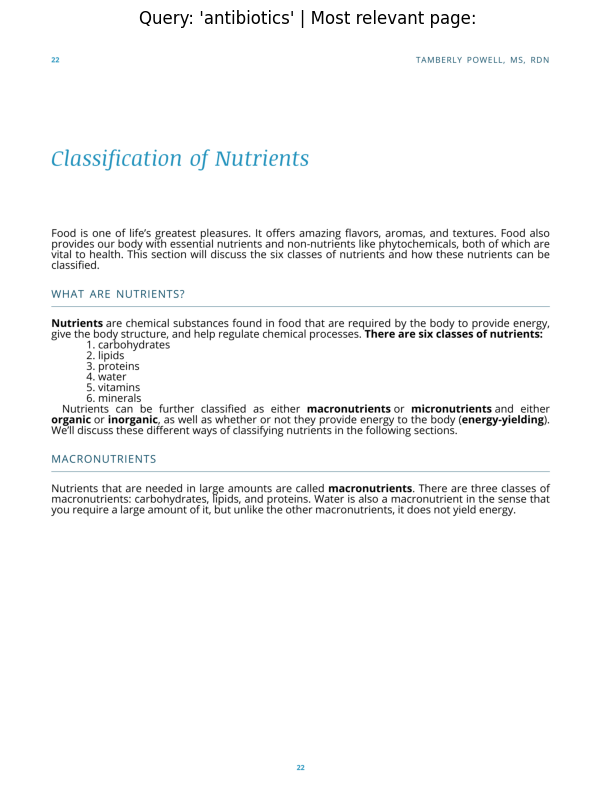

In [ ]:
import fitz

# Open PDF and load target page
pdf_path = "/content/Nutrition-Science-and-Everyday-Application.pdf" # requires PDF to be downloaded
doc = fitz.open(pdf_path)
page = doc.load_page(8 + 21) # number of page (our doc starts page numbers on page 41)

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Optional: save the image
#img.save("output_filename.png")
doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()

In [ ]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [ ]:
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create quantization config for smaller model loading (optional)
# Requires !pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires !pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
model_id = "bigscience/bloom-3b"
model_id = model_id # (we already set this above)
print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use full memory
                                                 attn_implementation="eager") # which attention version to use

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: bigscience/bloom-3b


In [ ]:
llm_model

BloomForCausalLM(
  (transformer): BloomModel(
    (word_embeddings): Embedding(250880, 2560)
    (word_embeddings_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
    (h): ModuleList(
      (0-29): 30 x BloomBlock(
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (self_attention): BloomAttention(
          (query_key_value): Linear(in_features=2560, out_features=7680, bias=True)
          (dense): Linear(in_features=2560, out_features=2560, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (post_attention_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (mlp): BloomMLP(
          (dense_h_to_4h): Linear(in_features=2560, out_features=10240, bias=True)
          (gelu_impl): BloomGelu()
          (dense_4h_to_h): Linear(in_features=10240, out_features=2560, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
  )
 

In [ ]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

3002557440

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    See: https://discuss.pytorch.org/t/gpu-memory-that-model-uses/56822
    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 6005114880, 'model_mem_mb': 5726.92, 'model_mem_gb': 5.59}

**Generating Text With LLM**

In [ ]:
input_text = "What are the symptoms of atherosclerosis in different parts of the body?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")


No chat template is defined for this tokenizer - using the default template for the BloomTokenizerFast class. If the default is not appropriate for your model, please set `tokenizer.chat_template` to an appropriate template. See https://huggingface.co/docs/transformers/main/chat_templating for more information.



Input text:
What are the symptoms of atherosclerosis in different parts of the body?

Prompt (formatted):
What are the symptoms of atherosclerosis in different parts of the body?</s>


In [ ]:
%%time

# Tokenize the input text (turn it into numbers) and send it to GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

# Generate outputs passed on the tokenized input
# See generate docs: https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/text_generation#transformers.GenerationConfig
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256) # define the maximum number of new tokens to create
print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[ 10560,   1306,    368,  71321,    461,    267,   2633,    302,    948,
         189594,    361,   5955,  16988,    461,    368,  12364,     34,      2]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}

Model output (tokens):
tensor([ 10560,   1306,    368,  71321,    461,    267,   2633,    302,    948,
        189594,    361,   5955,  16988,    461,    368,  12364,     34,      2,
          2175,   3968,  11736,   1152,   3423,    427,    727,    632,    427,
          2213,    267,   7220,  23898,     15,   6426,  23898,     15,    530,
          3829, 161001,   1976, 127898,     17,   1387,   7733,   1976, 127898,
           613,   5011,  22566,    632,   2592,    861,    632,   7086,   1485,
          8390,  27601,     17,  37371,  27601,   1306,    368,   7733,   5908,
          3291,   1306,  32169,    613,   2632,  12364,    530,   3291,   1306,


In [ ]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
What are the symptoms of atherosclerosis in different parts of the body?</s>The first thing you need to do is to get a good quality, high quality, and long lasting mattress. The best mattress for back pain is one that is made from natural materials. Natural materials are the best because they are safe for your body and they are also good for the environment. You can also find a mattress that is made from natural materials at a good price.</s>

